In [1]:
#https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data?select=Training

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# import keras.layers import Input,Dense,Flatten
from keras.layers import Input,Dense,Flatten
from keras.models import Model

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential

import os
from IPython.display import display
from IPython.display import Image as _Imdis

import warnings
warnings.filterwarnings("ignore",category = FutureWarning)


In [3]:
## upload the kaggle json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 98% 85.0M/86.8M [00:02<00:00, 40.1MB/s]
100% 86.8M/86.8M [00:02<00:00, 32.5MB/s]


In [5]:
from zipfile import ZipFile
dataset='/content/brain-tumor-classification-mri.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset has been extracted")


the dataset has been extracted


In [6]:
train_path = '/content/Training'
test_path = '/content/Testing'

number of images with us 826
gg (633).jpg


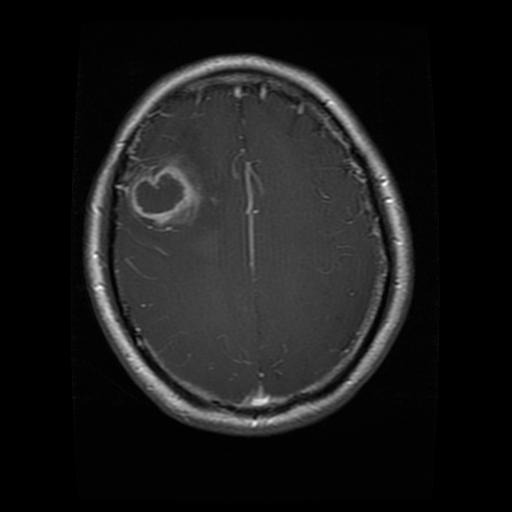

gg (702).jpg


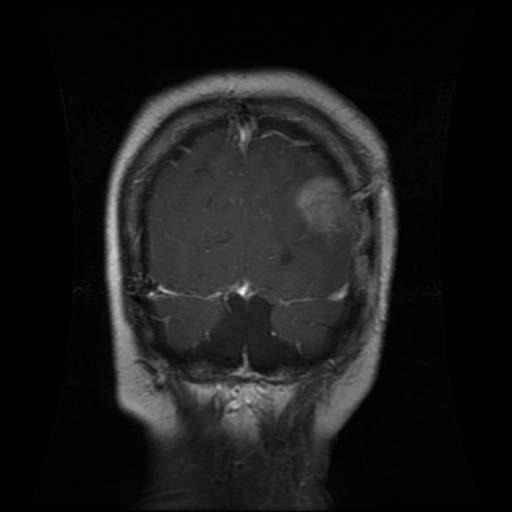

gg (193).jpg


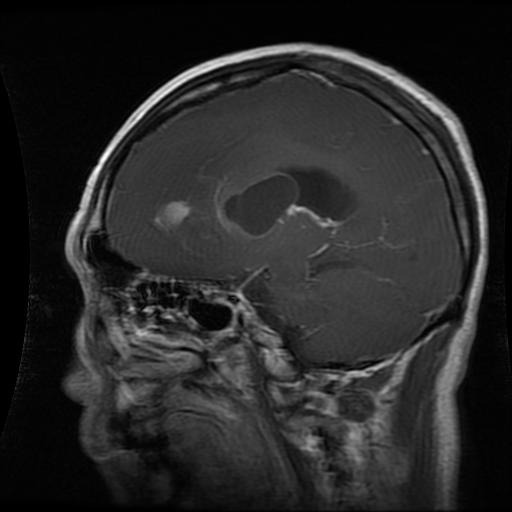

gg (67).jpg


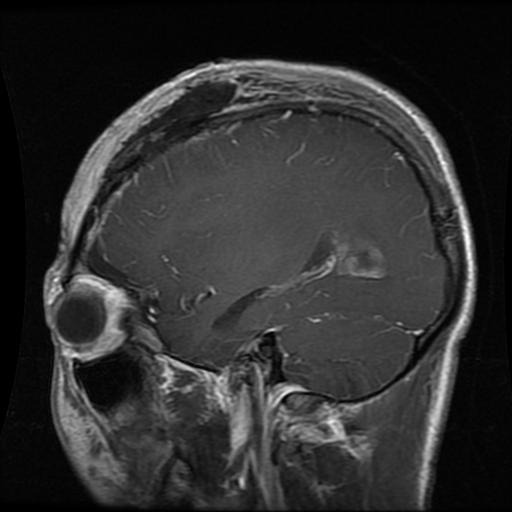

gg (456).jpg


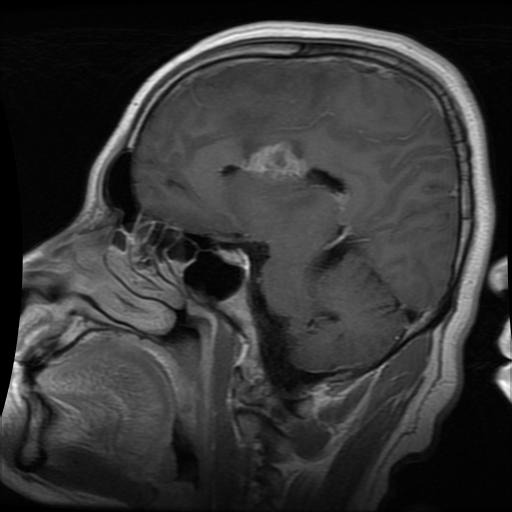

gg (25).jpg


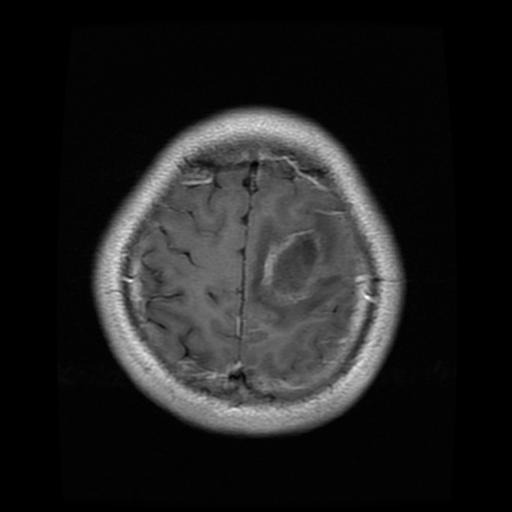

gg (437).jpg


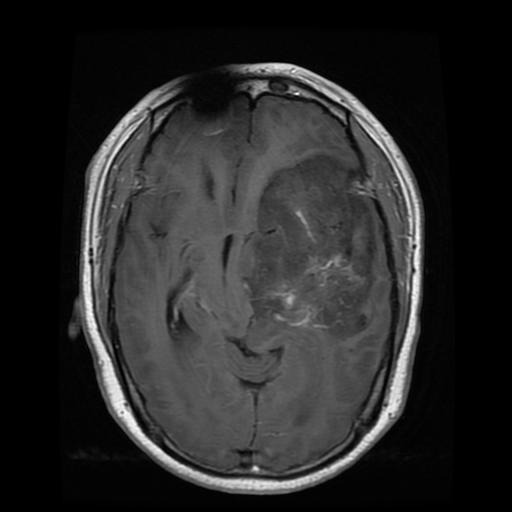

gg (2).jpg


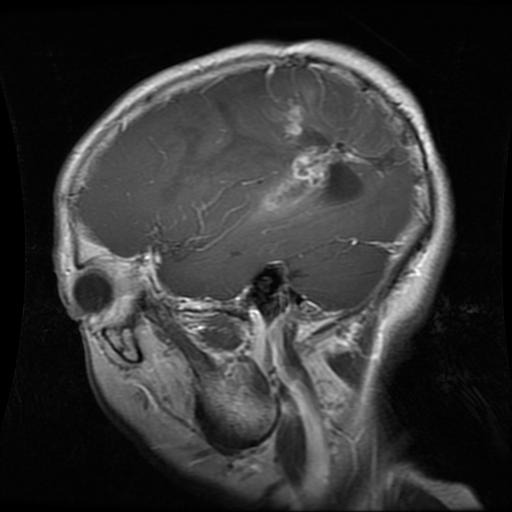

gg (287).jpg


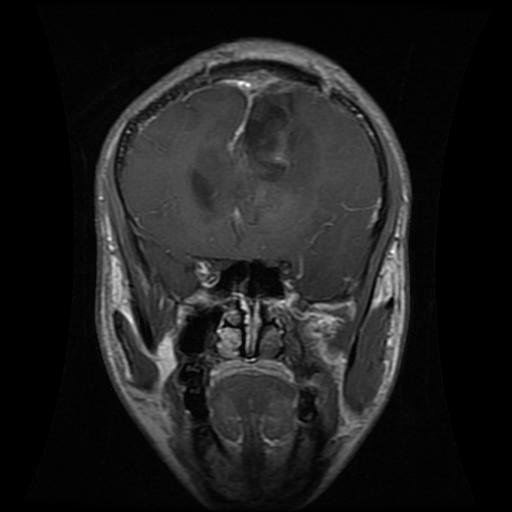

gg (84).jpg


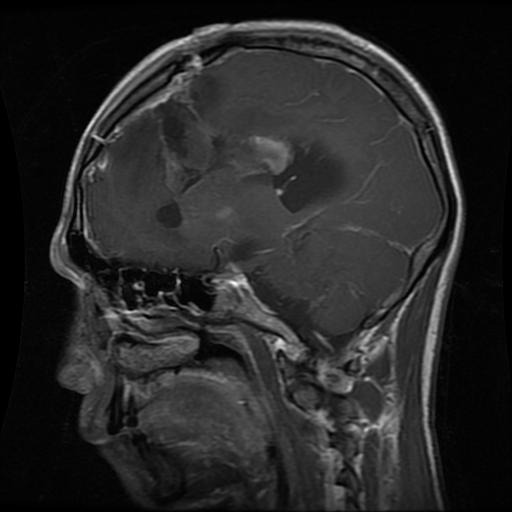

In [7]:
from PIL import Image

folder = train_path + "/glioma_tumor"

glioma_tumor = [f for f  in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]

print(f"number of images with us {len(glioma_tumor)}")

for i in range(10):
  print(glioma_tumor[i])
  display(_Imdis(filename = folder + "/" + glioma_tumor[i] ,width = 300,height = 300))


In [8]:
# define the input shape of model
image_shape = [224,224,3]

In [9]:
# keras.applications.VGG16(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )

In [10]:
"""

Arguments

include_top: whether to include the 3 fully-connected layers at the top of the network.
weights: one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.
input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
pooling: Optional pooling mode for feature extraction when include_top is False.
None means that the output of the model will be the 4D tensor output of the last convolutional block.
avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
max means that global max pooling will be applied.
classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.
classifier_activation: A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".

"""

'\n\nArguments\n\ninclude_top: whether to include the 3 fully-connected layers at the top of the network.\nweights: one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.\ninput_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.\ninput_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.\npooling: Optional pooling mode for feature extraction when include_top is False.\nNone means that the output of the model will be the 4D tensor output of the last convolutional block.\navg means that global average pooling will be applied to the output of the last convolutional block, and thus the 

In [11]:
# import model

pre_trained_model = VGG19(
    input_shape = (224, 224,3),
    include_top=False,
    weights = 'imagenet'

)

80134624/80134624 [==============================] - 2s 0us/step


In [12]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
for layer in pre_trained_model.layers:
  print(layer)

In [14]:
for layer in pre_trained_model.layers:
  print(layer)
  layer.trianable=False

In [15]:
from tensorflow.keras import metrics
import tensorflow as tf

metric = ["accuracy",
          metrics.Precision(name = "Prec"),
          metrics.Recall(name = "Rec"),
          tf.keras.metrics.TruePositives(name = "tp"),
          tf.keras.metrics.TrueNegatives(name = "tn")]

In [16]:
# lets create an instance for the model

model = Sequential([
                    pre_trained_model,
                    Flatten(),
                    #Dense(10,activation = "relu"),
                    # Dense(10,activation = "relu"),
                    # Dense(10,activation = "relu"),
                    # Dense(10,activation = "relu"),
                    Dense(4,activation = "softmax")

])

model.compile(
            optimizer = "adam",
            loss = tf.keras.losses.CategoricalCrossentropy(),
            metrics = metric)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4)                 100356    
                                                                 
Total params: 20124740 (76.77 MB)
Trainable params: 20124740 (76.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
## pre process the data

train_datagen = ImageDataGenerator(
                                  rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = .2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest"
)

test_datagen = ImageDataGenerator(
                                  rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = .2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest"
)

In [19]:
## pass the data through objects

train_data = train_datagen.flow_from_directory(
                                        train_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = "categorical"
)

test_data = test_datagen.flow_from_directory(
                                        test_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = "categorical"
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [20]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
                                      monitor ="val_accuracy",
                                      patience = 3,
                                      verbose = 1,
                                      min_lr = 0.0001
)

checkpoint = ModelCheckpoint(
                      filepath = "vgg19_model.h5",
                      verbose = True,
                      save_best_only = True
)

callbacks = [checkpoint,learning_rate_reduction]

start = datetime.now()

history = model.fit(
                  train_data ,
                  validation_data = test_data,
                  epochs = 2,
                  batch_size = 32,
                  callbacks = callbacks,
                  verbose = True
)

duration = datetime.now() - start


print("training is completed")

Epoch 1/2
90/90 [==============================] - ETA: 0s - loss: 2.3590 - accuracy: 0.2815 - Prec: 0.2619 - Rec: 0.0115 - tp: 33.0000 - tn: 8517.0000
Epoch 1: val_loss improved from inf to 1.49751, saving model to vgg19_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 105s 850ms/step - loss: 2.3590 - accuracy: 0.2815 - Prec: 0.2619 - Rec: 0.0115 - tp: 33.0000 - tn: 8517.0000 - val_loss: 1.4975 - val_accuracy: 0.2183 - val_Prec: 0.0000e+00 - val_Rec: 0.0000e+00 - val_tp: 0.0000e+00 - val_tn: 1182.0000 - lr: 0.0010
Epoch 2/2
90/90 [==============================] - ETA: 0s - loss: 1.3748 - accuracy: 0.2990 - Prec: 0.2969 - Rec: 0.0066 - tp: 19.0000 - tn: 8565.0000
Epoch 2: val_loss improved from 1.49751 to 1.42022, saving model to vgg19_model.h5
90/90 [==============================] - 59s 655ms/step - loss: 1.3748 - accuracy: 0.2990 - Prec: 0.2969 - Rec: 0.0066 - tp: 19.0000 - tn: 8565.0000 - val_loss: 1.4202 - val_accuracy: 0.1878 - val_Prec: 0.0000e+00 - val_Rec: 0.0000e+00 - val_tp: 0.0000e+00 - val_tn: 1182.0000 - lr: 0.0010
training is completed


In [22]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
                                      monitor ="val_accuracy",
                                      patience = 3,
                                      verbose = 1,
                                      min_lr = 0.0001
)

checkpoint = ModelCheckpoint(
                      filepath = "vgg19_model.h5",
                      verbose = True,
                      save_best_only = True
)

callbacks = [checkpoint,learning_rate_reduction]

start = datetime.now()

history = model.fit(
                  train_data ,
                  validation_data = test_data,
                  epochs = 15,
                  batch_size = 32,
                  callbacks = callbacks,
                  verbose = True
)

duration = datetime.now() - start


print("training is completed")

Epoch 1/15
90/90 [==============================] - ETA: 0s - loss: 1.3690 - accuracy: 0.2875 - Prec: 0.3125 - Rec: 0.0035 - tp: 10.0000 - tn: 8588.0000
Epoch 1: val_loss improved from inf to 1.47969, saving model to vgg19_model.h5
90/90 [==============================] - 60s 658ms/step - loss: 1.3690 - accuracy: 0.2875 - Prec: 0.3125 - Rec: 0.0035 - tp: 10.0000 - tn: 8588.0000 - val_loss: 1.4797 - val_accuracy: 0.2538 - val_Prec: 0.0000e+00 - val_Rec: 0.0000e+00 - val_tp: 0.0000e+00 - val_tn: 1182.0000 - lr: 0.0010
Epoch 2/15
90/90 [==============================] - ETA: 0s - loss: 1.3487 - accuracy: 0.2972 - Prec: 0.0000e+00 - Rec: 0.0000e+00 - tp: 0.0000e+00 - tn: 8610.0000
Epoch 2: val_loss improved from 1.47969 to 1.45552, saving model to vgg19_model.h5
90/90 [==============================] - 64s 715ms/step - loss: 1.3487 - accuracy: 0.2972 - Prec: 0.0000e+00 - Rec: 0.0000e+00 - tp: 0.0000e+00 - tn: 8610.0000 - val_loss: 1.4555 - val_accuracy: 0.2005 - val_Prec: 0.0000e+00 - val_

In [23]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
                                      monitor ="val_accuracy",
                                      patience = 3,
                                      verbose = 1,
                                      min_lr = 0.0001
)

checkpoint = ModelCheckpoint(
                      filepath = "vgg19_model.h5",
                      verbose = True,
                      save_best_only = True
)

callbacks = [checkpoint,learning_rate_reduction]

start = datetime.now()

history = model.fit(
                  train_data ,
                  validation_data = test_data,
                  epochs = 25,
                  batch_size = 32,
                  callbacks = callbacks,
                  verbose = True
)

duration = datetime.now() - start


print("training is completed")

Epoch 1/25
90/90 [==============================] - ETA: 0s - loss: 1.0838 - accuracy: 0.5202 - Prec: 0.6091 - Rec: 0.2617 - tp: 751.0000 - tn: 8128.0000
Epoch 1: val_loss improved from inf to 1.81505, saving model to vgg19_model.h5
90/90 [==============================] - 64s 708ms/step - loss: 1.0838 - accuracy: 0.5202 - Prec: 0.6091 - Rec: 0.2617 - tp: 751.0000 - tn: 8128.0000 - val_loss: 1.8150 - val_accuracy: 0.2893 - val_Prec: 0.3077 - val_Rec: 0.1320 - val_tp: 52.0000 - val_tn: 1065.0000 - lr: 1.0000e-04
Epoch 2/25
90/90 [==============================] - ETA: 0s - loss: 1.0650 - accuracy: 0.5251 - Prec: 0.6176 - Rec: 0.2808 - tp: 806.0000 - tn: 8111.0000
Epoch 2: val_loss did not improve from 1.81505
90/90 [==============================] - 59s 654ms/step - loss: 1.0650 - accuracy: 0.5251 - Prec: 0.6176 - Rec: 0.2808 - tp: 806.0000 - tn: 8111.0000 - val_loss: 1.9723 - val_accuracy: 0.2868 - val_Prec: 0.2844 - val_Rec: 0.1624 - val_tp: 64.0000 - val_tn: 1021.0000 - lr: 1.0000e-0

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'Prec', 'Rec', 'tp', 'tn', 'val_loss', 'val_accuracy', 'val_Prec', 'val_Rec', 'val_tp', 'val_tn', 'lr'])